In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
parentDir = "D:/CDAC/IACSD/Project/"
pd.set_option('display.float_format', lambda x: '%.3f' % x)
life_exep_data = pd.read_csv(parentDir + 'life_expectancy/imp/final.csv')

In [3]:
life_exep_data.head()

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,Afghanistan,2000,Female,57.120,13.846,85.000,13684491660.790,18240442244.769,6.400,434.740,...,24.000,65.077,27.000,0.300,21.871,85.000,22.078,77.922,39.400,4.800
1,Afghanistan,2001,Female,57.596,13.849,82.700,13684491660.790,18240442244.769,7.200,434.740,...,33.000,65.077,37.000,0.390,21.881,84.000,22.169,77.831,40.100,4.800
2,Afghanistan,2002,Female,58.080,14.355,80.400,4055179566.350,18240442244.769,8.200,179.427,...,36.000,65.077,35.000,0.390,23.274,87.000,22.261,77.739,40.500,4.600
3,Afghanistan,2003,Female,58.578,14.222,77.800,4515558808.110,18240442244.769,9.400,190.684,...,41.000,65.077,39.000,0.390,24.667,86.000,22.353,77.647,40.100,4.600
4,Afghanistan,2004,Female,59.093,14.047,75.300,5226778808.892,18240442244.769,10.400,211.382,...,50.000,65.077,48.000,0.390,26.068,89.000,22.500,77.500,40.200,4.600


In [4]:
life_exep_data.describe()

,Year,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
count,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000,9928.000
mean,2009.495,69.834,8.256,30.235,2032870320199.638,2042053577025.779,60.593,12668.853,18.229,136.043,85.685,81.308,84.855,2.986,71.106,76.726,55.559,44.441,22.100,10.619
std,5.762,9.302,6.155,25.461,7249369673698.859,7254721460142.498,36.964,19447.598,8.223,176.090,14.208,18.469,14.218,2.284,29.583,14.757,22.436,22.436,8.504,11.070
min,2000.000,38.861,0.052,1.400,63101272.370,72802185.001,0.000,111.927,0.000,0.000,19.000,0.050,16.000,0.010,2.755,0.000,8.246,0.000,4.400,0.000
25%,2005.000,63.894,4.331,9.300,7267552276.129,7584112233.046,23.000,1366.059,12.700,21.000,81.000,75.083,79.000,1.308,46.007,73.000,36.519,26.118,16.300,4.000
50%,2009.000,71.445,6.561,23.300,45247974037.038,45940355554.258,61.950,4348.605,18.229,82.000,90.104,86.700,89.320,2.632,84.227,78.000,55.367,44.633,21.925,7.800
75%,2014.000,76.845,10.133,44.865,501278724553.924,523061711019.377,99.334,14443.944,24.100,159.000,96.000,95.000,95.092,3.600,97.177,86.000,73.882,63.481,26.200,12.300
max,2019.000,88.100,43.166,146.200,87568054407493.094,87532722519257.594,100.000,180366.715,64.600,1590.000,99.000,99.000,99.000,14.690,100.000,100.000,100.000,91.754,64.100,147.800


In [5]:
life_exep_data.skew(axis = 0, numeric_only = True)

Year                                      -0.001
Life expectancy                           -0.617
Unemployment                               1.768
Infant Mortality                           1.089
GDP                                        5.889
GNI                                        5.910
Clean fuels and cooking technologies      -0.383
Per Capita                                 2.994
Mortality caused by road traffic injury    0.213
Tuberculosis Incidence                     3.097
DPT Immunization                          -1.661
HepB3 Immunization                        -1.792
Measles Immunization                      -1.434
Hospital beds                              1.668
Basic sanitation services                 -0.759
Tuberculosis treatment                    -2.230
Urban population                           0.067
Rural population                          -0.067
Non-communicable Mortality                 0.880
Sucide Rate                                3.686
dtype: float64

In [6]:
## Inter Quartile Range(IQR)
## Equation -> IQR = Q3 - Q1
## min value of whiskers in box plot -> Q1 - 1.5 * IQR
## max value of whiskers in box plot -> Q3 + 1.5 * IQR

def min_max_iqr(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_valid = Q1 - 1.5 * IQR
    max_valid = Q3 + 1.5 * IQR
    return min_valid, max_valid

In [7]:
skip_columns = ['Country', 'Year', 'Gender']
for column in life_exep_data.columns:
    if not column in skip_columns:
        min_valid, max_valid = min_max_iqr(life_exep_data, column)
        outlier_rows = life_exep_data[(life_exep_data[column] < min_valid) | (life_exep_data[column] > max_valid)]
        perc_outlier_rows = (outlier_rows.shape[0] / life_exep_data.shape[0])
        print("Column Name = ", column)
        print("min_valid = ", min_valid)
        print("max_valid = ", max_valid)
        print("Count of outlier rows = ", outlier_rows.shape[0])
        print("% of outlier rows = ", perc_outlier_rows, end = '\n')
        print(end = '\n')

Column Name =  Life expectancy
min_valid =  44.46775000000001
max_valid =  96.27174999999998
Count of outlier rows =  59
% of outlier rows =  0.005942788074133763

Column Name =  Unemployment
min_valid =  -4.37162542343135
max_valid =  18.83537530899041
Count of outlier rows =  758
% of outlier rows =  0.07634971796937953

Column Name =  Infant Mortality
min_valid =  -44.04757453901824
max_valid =  98.21262423169706
Count of outlier rows =  153
% of outlier rows =  0.015410958904109588

Column Name =  GDP
min_valid =  -733749206140.5651
max_valid =  1242295482970.6182
Count of outlier rows =  1780
% of outlier rows =  0.17929089443996776

Column Name =  GNI
min_valid =  -765632285946.4509
max_valid =  1296278109198.8738
Count of outlier rows =  1814
% of outlier rows =  0.18271555197421435

Column Name =  Clean fuels and cooking technologies
min_valid =  -91.50038376556871
max_valid =  213.83397294261454
Count of outlier rows =  0
% of outlier rows =  0.0

Column Name =  Per Capita
min

In [8]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, color = 'purple', edgecolor = "white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.savefig(parentDir + "life_expectancy/images/histogram/" + title +'.png', transparent=False, facecolor='w')

In [9]:
def plot_boxplot(column):
    sns.boxplot(data = life_exep_data, x = life_exep_data[column], color = '#00A000')
    plt.savefig(parentDir + "life_expectancy/images/boxplot/" + column +'.png', transparent=False, facecolor='w')

In [10]:
def get_outlier(df, column):
    Q1, Q3 = df[column].quantile([0.25,0.75])
    IQR = Q3 - Q1
    return df[(df[column] > (Q3 + 1.5 * IQR)) | (df[column] < (Q1 - 1.5 * IQR))].sort_values(by = [column]).reset_index()

In [11]:
## Imputation of outlier (IQR)
# def impute_outliers(column):
#     min_valid, max_valid = min_max_iqr(life_exep_data, column)
#     # impute the outlier row values
#     life_exep_data.loc[ life_exep_data[column] < min_valid , column] = min_valid
#     life_exep_data.loc[ life_exep_data[column] > max_valid , column] = max_valid

Lets visualise the distribution of Life Expectancy at birth.

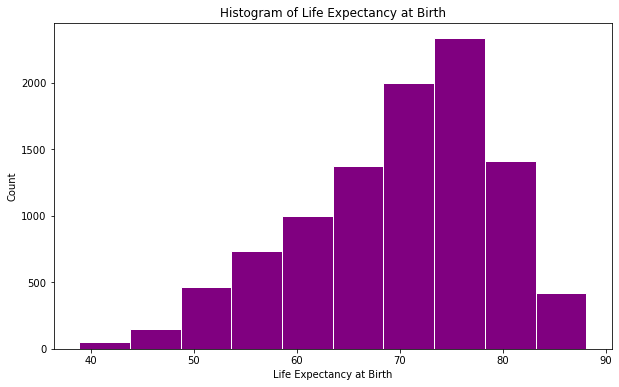

In [12]:
plot_histogram(life_exep_data['Life expectancy'], 'Count', 'Life Expectancy at Birth', 
               "Histogram of Life Expectancy at Birth")

From the above histogram we can conclude that most of data lies between 70 and 80.

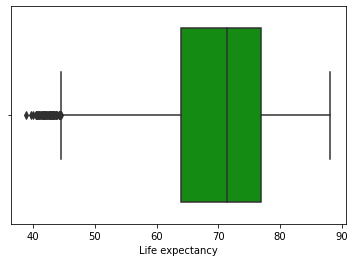

In [13]:
# sns.boxplot(data=life_exep_data, x=life_exep_data['Life expectancy'], color='green')
plot_boxplot('Life expectancy')

In [14]:
df = get_outlier(life_exep_data, 'Life expectancy')

df[['Country','Year','Gender','Life expectancy']]

,Country,Year,Gender,Life expectancy
0,Sierra Leone,2000,Male,38.861
1,Sierra Leone,2001,Male,39.745
2,Sierra Leone,2000,Female,40.005
3,Lesotho,2006,Male,40.418
4,Lesotho,2007,Male,40.555
5,Lesotho,2005,Male,40.566
6,Eswatini,2005,Male,40.663
7,Sierra Leone,2002,Male,40.708
8,Eswatini,2004,Male,40.749
9,Eswatini,2006,Male,40.923


Next we are going to do visualise the distribution of Unemployment column.

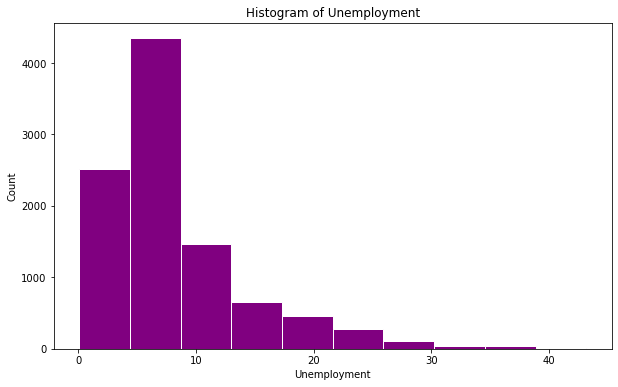

In [15]:
plot_histogram(life_exep_data['Unemployment'], 'Count', 'Unemployment', "Histogram of Unemployment")

From the above histogram we can conclude most of the data are between 5 to 10.

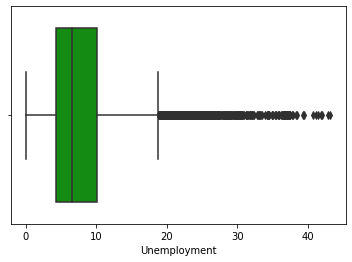

In [16]:
plot_boxplot('Unemployment')

In [17]:
df = get_outlier(life_exep_data, 'Unemployment')

df[['Country','Year','Gender','Unemployment']]

,Country,Year,Gender,Unemployment
0,Bulgaria,2001,Female,18.855
1,Bosnia and Herzegovina,2017,Male,18.857
2,Poland,2003,Male,18.898
3,St. Lucia,2015,Male,18.905
4,"Congo, Rep.",2012,Male,18.911
...,...,...,...,...
753,South Africa,2002,Female,41.372
754,West Bank and Gaza,2018,Female,41.873
755,Lesotho,2001,Female,41.936
756,West Bank and Gaza,2017,Female,42.811


Next we are going to do visualise the distribution of Infant Mortality column.

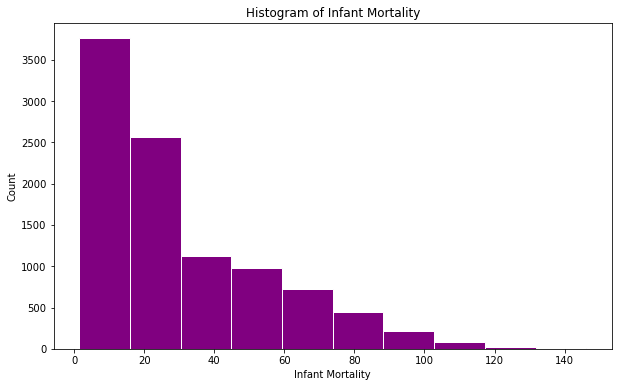

In [18]:
plot_histogram(life_exep_data['Infant Mortality'], 'Count', 'Infant Mortality', "Histogram of Infant Mortality")

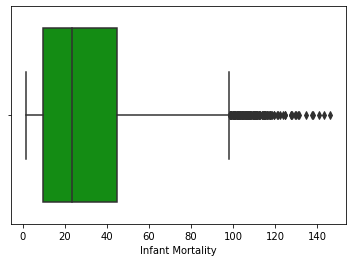

In [19]:
plot_boxplot('Infant Mortality')

In [20]:
df = get_outlier(life_exep_data, 'Infant Mortality')

df[['Country','Year','Gender','Infant Mortality']]

,Country,Year,Gender,Infant Mortality
0,Liberia,2005,Male,98.500
1,Chad,2006,Male,98.500
2,Equatorial Guinea,2000,Female,98.500
3,Sub-Saharan Africa (IDA & IBRD countries),2000,Male,98.551
4,Sub-Saharan Africa (excluding high income),2000,Male,98.556
...,...,...,...,...
148,Sierra Leone,2003,Male,137.700
149,Liberia,2000,Male,137.800
150,Sierra Leone,2002,Male,140.700
151,Sierra Leone,2001,Male,143.400


Next we are going to do visualise the distribution of GDP column.

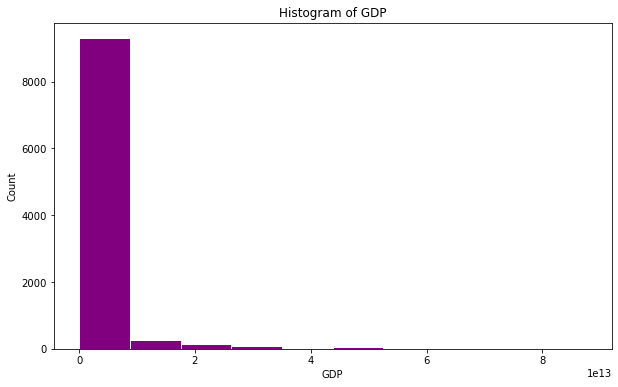

In [21]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

From the above histogram we can conclude that the data has right skewed.

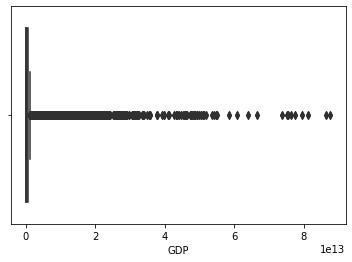

In [22]:
plot_boxplot('GDP')

In [23]:
df = get_outlier(life_exep_data, 'GDP')

df[['Country','Year','Gender','GDP']]

,Country,Year,Gender,GDP
0,"Korea, Rep.",2011,Female,1253223044718.990
1,"Korea, Rep.",2011,Male,1253223044718.990
2,Europe & Central Asia (IDA & IBRD countries),2003,Female,1257924182661.530
3,Europe & Central Asia (IDA & IBRD countries),2003,Male,1257924182661.530
4,Pre-demographic dividend,2017,Female,1258665620177.510
...,...,...,...,...
1775,World,2017,Female,81193291658568.797
1776,World,2018,Male,86267600625419.406
1777,World,2018,Female,86267600625419.406
1778,World,2019,Female,87568054407493.094


In [24]:
# impute_outliers('GDP')

In [25]:
life_exep_data['GDP'] = np.log(life_exep_data['GDP'])

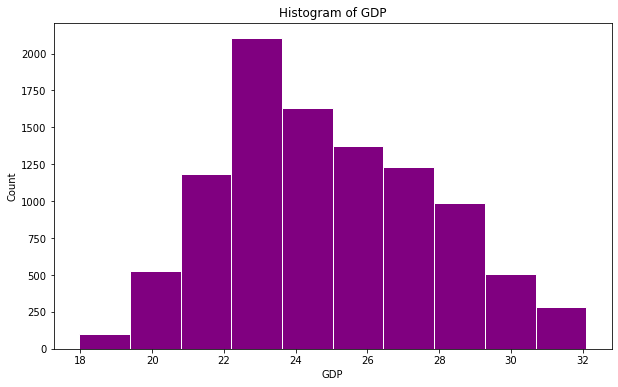

In [26]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

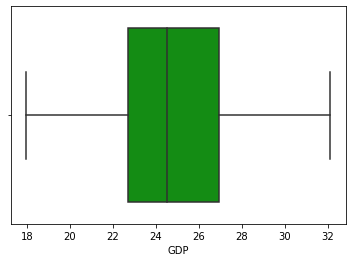

In [27]:
plot_boxplot('GDP')

Next we are going to do visualise the distribution of GNI column.

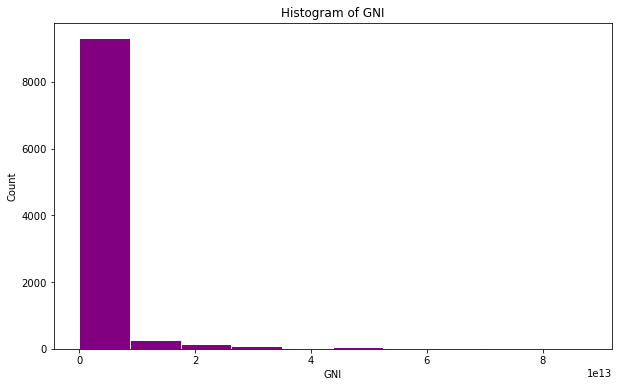

In [28]:
plot_histogram(life_exep_data['GNI'], 'Count', 'GNI', "Histogram of GNI")

From the above histogram we can conclude that the data has right skewed.

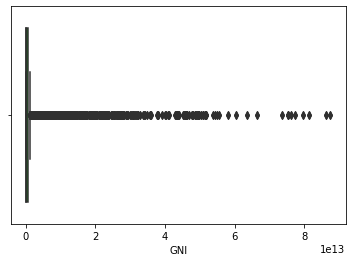

In [29]:
plot_boxplot('GNI')

In [30]:
df = get_outlier(life_exep_data, 'GNI')

df[['Country','Year','Gender','GNI']]

,Country,Year,Gender,GNI
0,Canada,2006,Female,1298296897038.080
1,Canada,2006,Male,1298296897038.080
2,Pre-demographic dividend,2018,Female,1298903761942.880
3,Pre-demographic dividend,2018,Male,1298903761942.880
4,Europe & Central Asia (excluding high income),2004,Male,1304878637091.600
...,...,...,...,...
1809,World,2017,Female,81295071732629.797
1810,World,2018,Male,86243803476022.203
1811,World,2018,Female,86243803476022.203
1812,World,2019,Female,87532722519257.594


In [31]:
# impute_outliers('GNI')

In [32]:
life_exep_data['GNI'] = np.log(life_exep_data['GNI'])

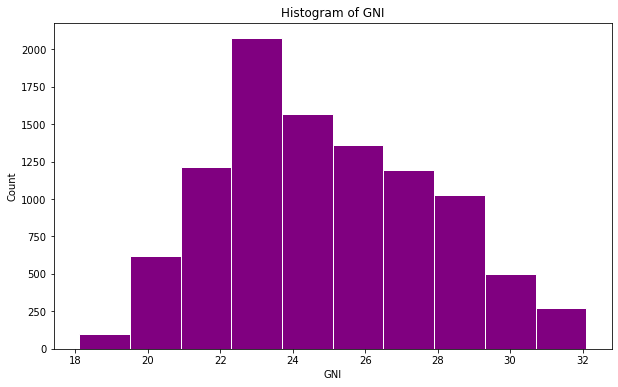

In [33]:
plot_histogram(life_exep_data['GNI'], 'Count', 'GNI', "Histogram of GNI")

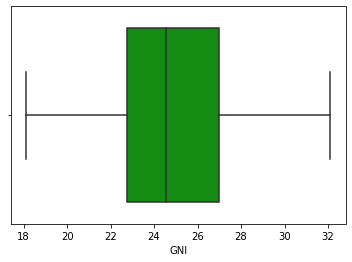

In [34]:
plot_boxplot('GNI')

Next we are going to do visualise the distribution of Clean fuels and cooking technologies column.

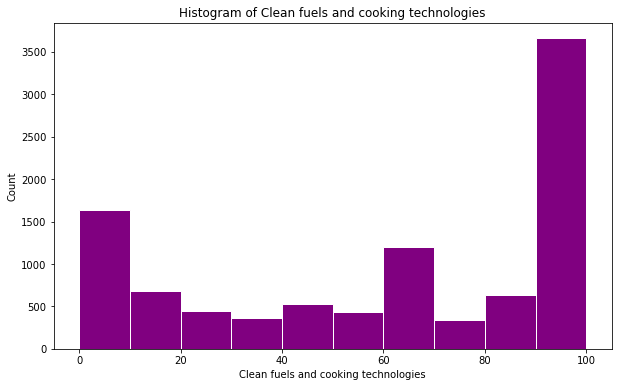

In [35]:
plot_histogram(life_exep_data['Clean fuels and cooking technologies'], 'Count', 'Clean fuels and cooking technologies', 
               "Histogram of Clean fuels and cooking technologies")

From the above histogram we can find that most of the data lies between 90 and 100.

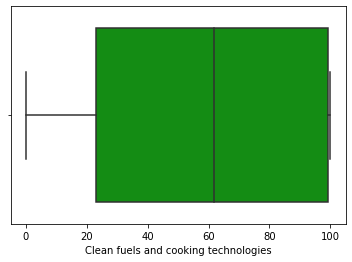

In [36]:
plot_boxplot('Clean fuels and cooking technologies')

In [37]:
df = get_outlier(life_exep_data, 'Clean fuels and cooking technologies')

df[['Country','Year','Gender','Clean fuels and cooking technologies']]

,Country,Year,Gender,Clean fuels and cooking technologies


Next we are going to do visualise the distribution of Per Capita column.

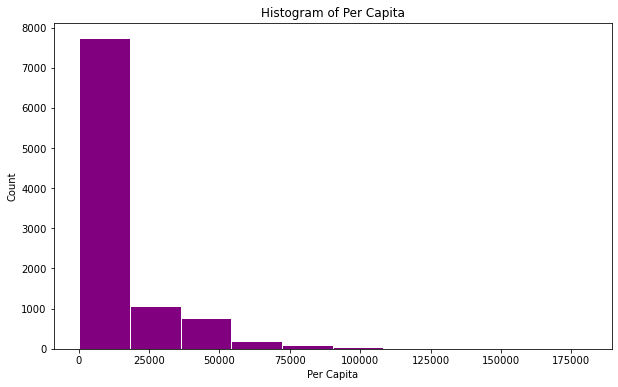

In [38]:
plot_histogram(life_exep_data['Per Capita'], 'Count', 'Per Capita', "Histogram of Per Capita")

Per Capita income has distribution of right skewed.

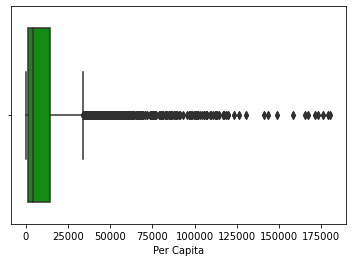

In [39]:
plot_boxplot('Per Capita')

In [40]:
df = get_outlier(life_exep_data, 'Per Capita')

df[['Country','Year','Gender','Per Capita']]

,Country,Year,Gender,Per Capita
0,Australia,2005,Female,34081.000
1,Australia,2005,Male,34081.000
2,Post-demographic dividend,2005,Male,34154.477
3,Post-demographic dividend,2005,Female,34154.477
4,OECD members,2007,Male,34324.687
...,...,...,...,...
1235,Liechtenstein,2019,Female,175813.876
1236,Liechtenstein,2014,Female,178864.852
1237,Liechtenstein,2014,Male,178864.852
1238,Liechtenstein,2018,Female,180366.715


Next we are going to do visualise the distribution of Mortality caused by road traffic injury column.

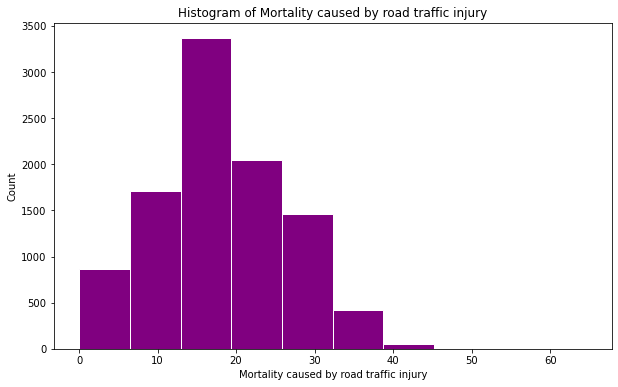

In [41]:
plot_histogram(life_exep_data['Mortality caused by road traffic injury'], 'Count', 
               'Mortality caused by road traffic injury', "Histogram of Mortality caused by road traffic injury")

The above histogram shows that the data are normaly distributed.

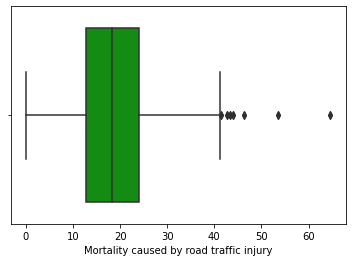

In [42]:
plot_boxplot('Mortality caused by road traffic injury')

In [43]:
df = get_outlier(life_exep_data, 'Mortality caused by road traffic injury')

df[['Country','Year','Gender','Mortality caused by road traffic injury']]

,Country,Year,Gender,Mortality caused by road traffic injury
0,South Africa,2004,Female,41.300
1,South Africa,2004,Male,41.300
2,Lesotho,2017,Female,42.600
3,Lesotho,2017,Male,42.600
4,South Africa,2003,Female,43.400
5,South Africa,2003,Male,43.400
6,South Africa,2000,Female,44.000
7,South Africa,2000,Male,44.000
8,Dominican Republic,2017,Female,46.300
9,Dominican Republic,2017,Male,46.300


Next we are going to do visualise the distribution of Tuberculosis Incidence column.

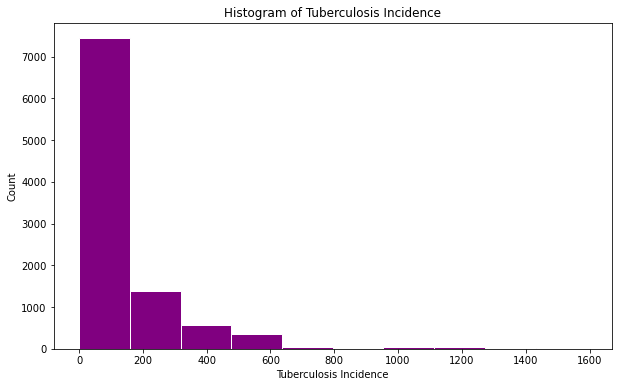

In [44]:
plot_histogram(life_exep_data['Tuberculosis Incidence'], 'Count', 'Tuberculosis Incidence', 
               "Histogram of Tuberculosis Incidence")

Tuberculosis Incidence has distribution of right skewed.

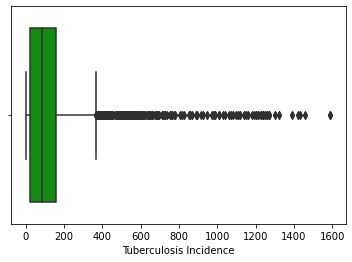

In [45]:
plot_boxplot('Tuberculosis Incidence')

In [46]:
df = get_outlier(life_exep_data, 'Tuberculosis Incidence')

df[['Country','Year','Gender','Tuberculosis Incidence']]

,Country,Year,Gender,Tuberculosis Incidence
0,Cote d'Ivoire,2000,Female,367.000
1,Djibouti,2015,Female,367.000
2,Indonesia,2002,Female,367.000
3,Cote d'Ivoire,2000,Male,367.000
4,Djibouti,2015,Male,367.000
...,...,...,...,...
805,Eswatini,2006,Male,1460.000
806,Eswatini,2009,Female,1590.000
807,Eswatini,2010,Female,1590.000
808,Eswatini,2009,Male,1590.000


Next we are going to do visualise the distribution of DPT Immunization column.

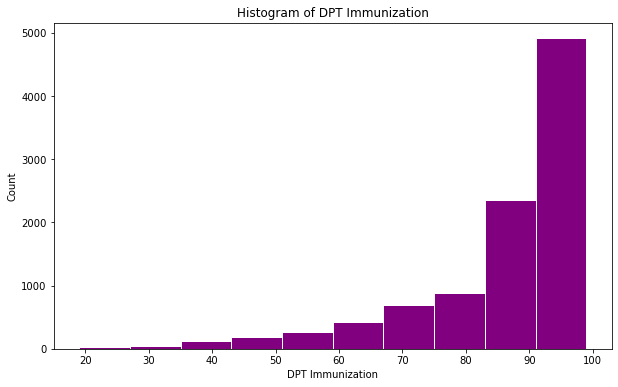

In [47]:
plot_histogram(life_exep_data['DPT Immunization'], 'Count', 'DPT Immunization', "Histogram of DPT Immunization")

The data of DPT Immunization is skewed towards left.

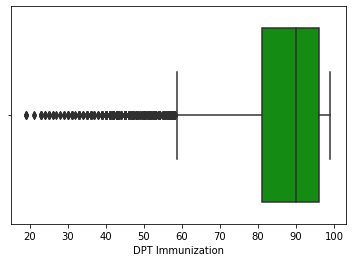

In [48]:
plot_boxplot('DPT Immunization')

In [49]:
df = get_outlier(life_exep_data, 'DPT Immunization')

df[['Country','Year','Gender','DPT Immunization']]

,Country,Year,Gender,DPT Immunization
0,Ukraine,2016,Male,19.000
1,Chad,2008,Male,19.000
2,Chad,2008,Female,19.000
3,Ukraine,2016,Female,19.000
4,Chad,2004,Female,21.000
...,...,...,...,...
643,Ethiopia,2009,Female,58.000
644,Samoa,2019,Female,58.000
645,Afghanistan,2006,Male,58.000
646,IDA total,2001,Male,58.182


Next we are going to do visualise the distribution of HepB3 Immunization column.

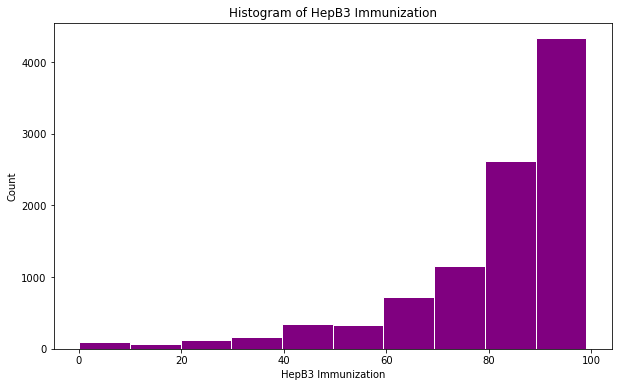

In [50]:
plot_histogram(life_exep_data['HepB3 Immunization'], 'Count', 'HepB3 Immunization', "Histogram of HepB3 Immunization")

The data of HepB3 Immunization is skewed towards left.

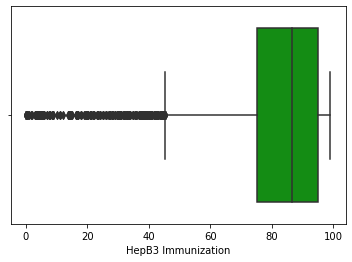

In [51]:
plot_boxplot('HepB3 Immunization')

In [52]:
df = get_outlier(life_exep_data, 'HepB3 Immunization')

df[['Country','Year','Gender','HepB3 Immunization']]

,Country,Year,Gender,HepB3 Immunization
0,South Asia,2002,Male,0.050
1,South Asia (IDA & IBRD),2002,Female,0.050
2,South Asia (IDA & IBRD),2002,Male,0.050
3,South Asia,2002,Female,0.050
4,South Asia (IDA & IBRD),2001,Male,0.053
...,...,...,...,...
645,Nigeria,2003,Male,45.133
646,Nigeria,2003,Female,45.133
647,Nigeria,2004,Male,45.133
648,Nigeria,2002,Female,45.133


Next we are going to do visualise the distribution of Measles Immunization column.

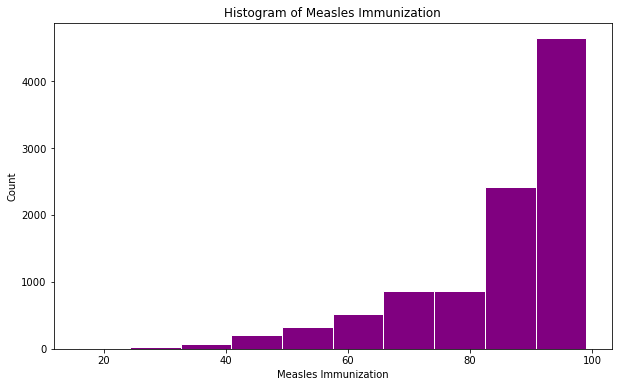

In [53]:
plot_histogram(life_exep_data['Measles Immunization'], 'Count', 'Measles Immunization', 
               "Histogram of Measles Immunization")

The data of Measles Immunization is skewed towards left.

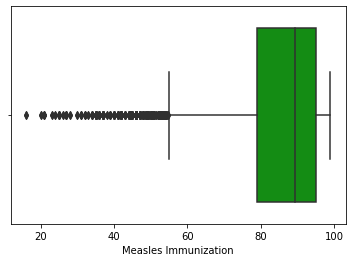

In [54]:
plot_boxplot('Measles Immunization')

In [55]:
df = get_outlier(life_exep_data, 'Measles Immunization')

df[['Country','Year','Gender','Measles Immunization']]

,Country,Year,Gender,Measles Immunization
0,Chad,2004,Female,16.000
1,Chad,2004,Male,16.000
2,Somalia,2001,Female,20.000
3,Somalia,2001,Male,20.000
4,Angola,2005,Male,21.000
...,...,...,...,...
483,South Sudan,2006,Male,54.111
484,Heavily indebted poor countries (HIPC),2000,Female,54.326
485,Heavily indebted poor countries (HIPC),2000,Male,54.326
486,Heavily indebted poor countries (HIPC),2001,Female,54.738


Next we are going to do visualise the distribution of Hospital beds column.

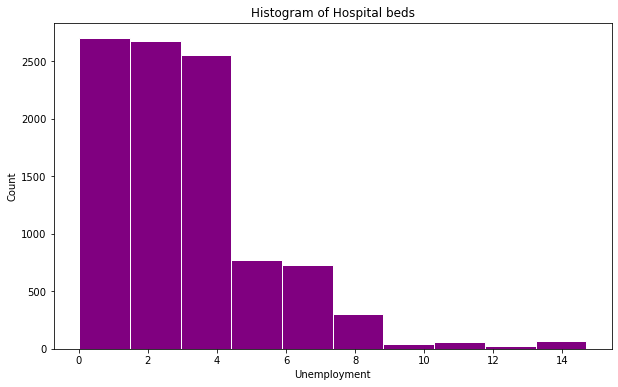

In [56]:
plot_histogram(life_exep_data['Hospital beds'], 'Count', 'Unemployment', "Histogram of Hospital beds")

The data of Hospital beds is skewed towards right.

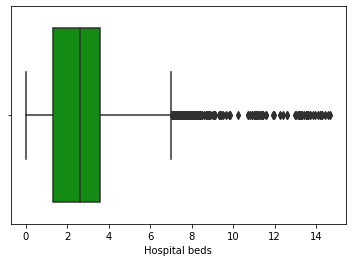

In [57]:
plot_boxplot('Hospital beds')

In [58]:
df = get_outlier(life_exep_data, 'Hospital beds')

df[['Country','Year','Gender','Hospital beds']]

,Country,Year,Gender,Hospital beds
0,Estonia,2000,Male,7.040
1,Hungary,2013,Male,7.040
2,Kyrgyz Republic,2000,Male,7.040
3,Hungary,2013,Female,7.040
4,Kyrgyz Republic,2000,Female,7.040
...,...,...,...,...
603,Japan,2002,Male,14.430
604,Japan,2001,Male,14.580
605,Japan,2001,Female,14.580
606,Japan,2000,Female,14.690


Next we are going to do visualise the distribution of Histogram of Basic sanitation services column.

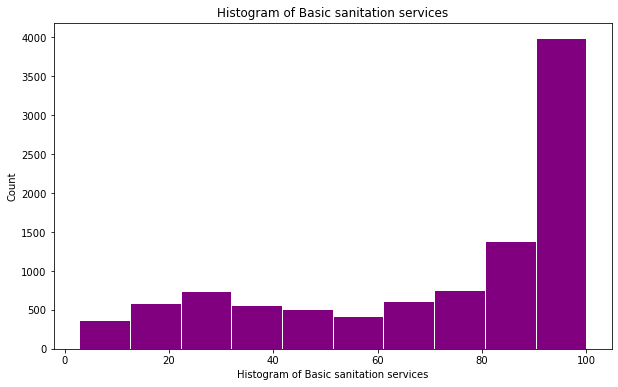

In [59]:
plot_histogram(life_exep_data['Basic sanitation services'], 'Count', 'Histogram of Basic sanitation services', 
               "Histogram of Basic sanitation services")

From the above histogram we can find that the most of the data lies between 90 to 100.

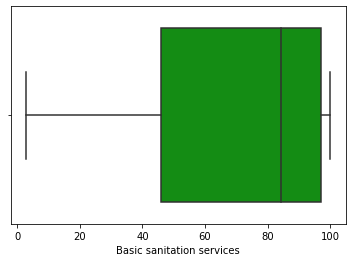

In [60]:
plot_boxplot('Basic sanitation services')

In [61]:
df = get_outlier(life_exep_data, 'Basic sanitation services')

df[['Country','Year','Gender','Basic sanitation services']]

,Country,Year,Gender,Basic sanitation services


Next we are going to do visualise the distribution of Tuberculosis treatment column.

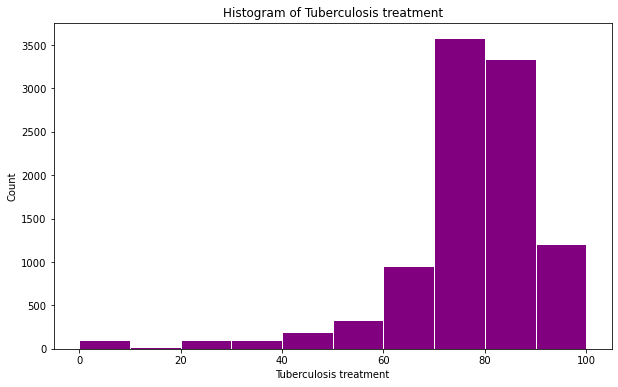

In [62]:
plot_histogram(life_exep_data['Tuberculosis treatment'], 'Count', 'Tuberculosis treatment', 
               "Histogram of Tuberculosis treatment")

From the above histogram we can find that the most of the data of Tuberculosis treatment lies between 70 to 90.

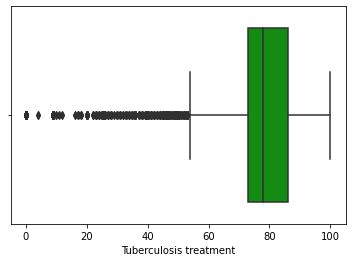

In [63]:
plot_boxplot('Tuberculosis treatment')

In [64]:
df = get_outlier(life_exep_data, 'Tuberculosis treatment')

df[['Country','Year','Gender','Tuberculosis treatment']]

,Country,Year,Gender,Tuberculosis treatment
0,Greece,2002,Male,0.000
1,Greece,2005,Male,0.000
2,Greece,2004,Male,0.000
3,Luxembourg,2017,Male,0.000
4,Greece,2003,Male,0.000
...,...,...,...,...
631,Senegal,2001,Female,53.000
632,South Africa,2010,Female,53.000
633,"Congo, Rep.",2006,Female,53.000
634,"Congo, Rep.",2006,Male,53.000


Next we are going to do visualise the distribution of Urban population column.

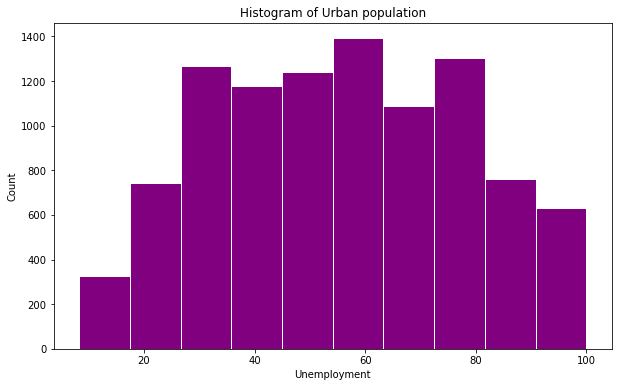

In [65]:
plot_histogram(life_exep_data['Urban population'], 'Count', 'Unemployment', "Histogram of Urban population")

The above histogram shows that the data has comb distribution.

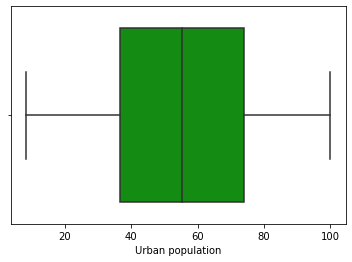

In [66]:
plot_boxplot('Urban population')

In [67]:
df = get_outlier(life_exep_data, 'Urban population')

df[['Country','Year','Gender','Urban population']]

,Country,Year,Gender,Urban population


Next we are going to do visualise the distribution of Rural population column.

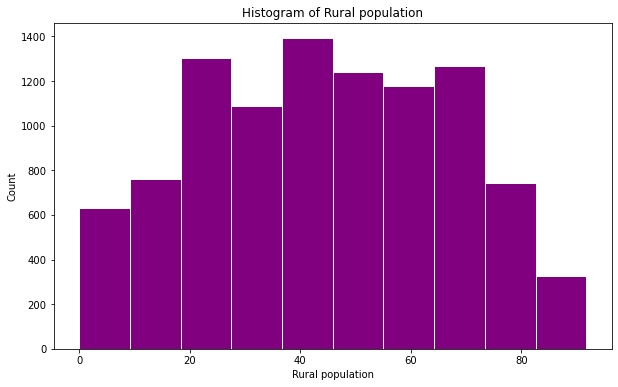

In [68]:
plot_histogram(life_exep_data['Rural population'], 'Count', 'Rural population', "Histogram of Rural population")

Distribution of rural population is similar to urban population and has comb distribution.

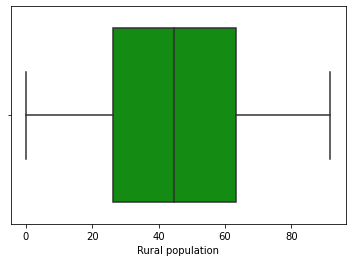

In [69]:
plot_boxplot('Rural population')

In [70]:
df = get_outlier(life_exep_data, 'Rural population')

df[['Country','Year','Gender','Rural population']]

,Country,Year,Gender,Rural population


Next we are going to do visualise the distribution of Histogram of Non-communicable Mortality column.

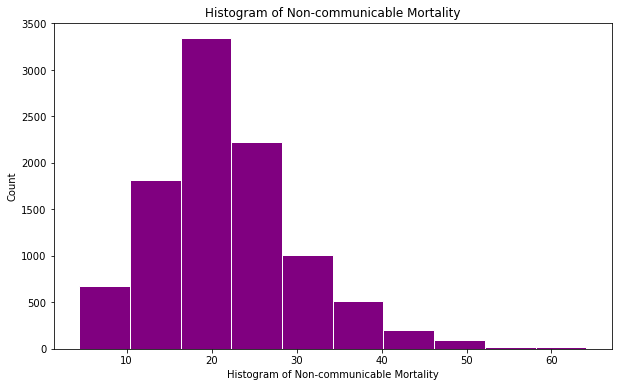

In [71]:
plot_histogram(life_exep_data['Non-communicable Mortality'], 'Count', 'Histogram of Non-communicable Mortality', 
               "Histogram of Non-communicable Mortality")

Non-communicable data is normally distributed and skewed towards right.

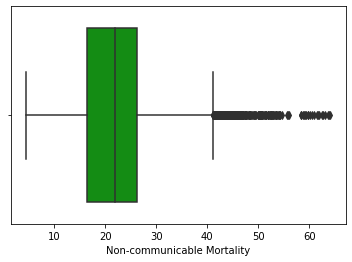

In [72]:
plot_boxplot('Non-communicable Mortality')

In [73]:
df = get_outlier(life_exep_data, 'Non-communicable Mortality')

df[['Country','Year','Gender','Non-communicable Mortality']]

,Country,Year,Gender,Non-communicable Mortality
0,Lesotho,2016,Female,41.100
1,Solomon Islands,2006,Male,41.100
2,Solomon Islands,2001,Male,41.100
3,Botswana,2007,Male,41.100
4,Solomon Islands,2000,Male,41.100
...,...,...,...,...
314,Kiribati,2004,Male,62.600
315,Kiribati,2003,Male,63.000
316,Kiribati,2002,Male,63.600
317,Kiribati,2001,Male,63.900


Next we are going to do visualise the distribution of Sucide Rate column.

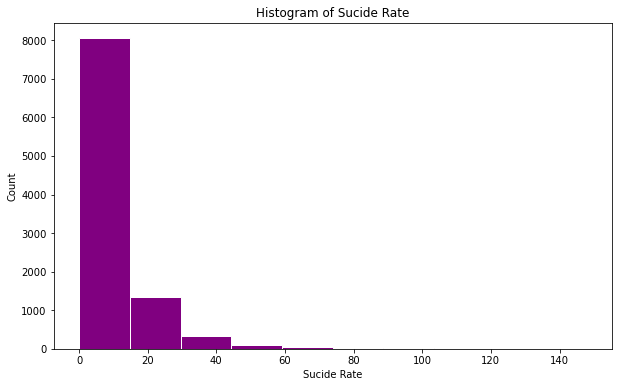

In [74]:
plot_histogram(life_exep_data['Sucide Rate'], 'Count', 'Sucide Rate', "Histogram of Sucide Rate")

Sucide Rate data is skewed towards right.

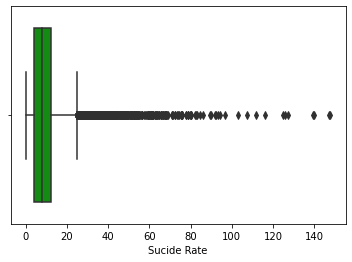

In [75]:
plot_boxplot('Sucide Rate')

In [76]:
df = get_outlier(life_exep_data, 'Sucide Rate')

df[['Country','Year','Gender','Sucide Rate']]

,Country,Year,Gender,Sucide Rate
0,Austria,2015,Male,24.800
1,Japan,2016,Male,24.800
2,Austria,2009,Male,24.800
3,Cabo Verde,2011,Male,24.800
4,Cabo Verde,2012,Male,24.800
...,...,...,...,...
747,Lesotho,2017,Male,127.200
748,Lesotho,2016,Male,139.600
749,Lesotho,2013,Male,139.900
750,Lesotho,2015,Male,147.300


From the above analysis we have found that there is serious issue of outlier on GDP and GNI.

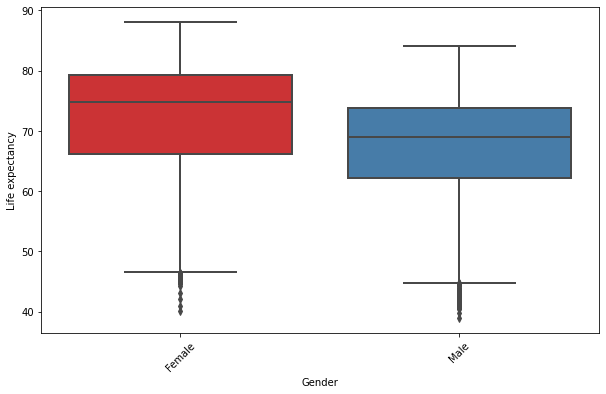

In [77]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = life_exep_data, x = life_exep_data['Gender'], y = life_exep_data['Life expectancy'], linewidth = 2, 
            palette = "Set1")
plt.xticks(rotation = 45)
plt.savefig(parentDir + "life_expectancy/images/boxplot/" + 'Life expectancy based on Gender.png', transparent=False, facecolor='w')

From the above boxplot, we can easily pridict that female has higher Life expectancy than male.

In [78]:
def plot_regplot(column):
    # The seaborn.set() function is used to control the theme and configurations of the seaborn plot.
    # The rc parameter of the function can be used to control the size of the final figure.
    # We will pass a dictionary as the value to this parameter with the key as figure.figsize and the required dimensions as the value.
    sns.set(rc = {'figure.figsize':(10,10)})
    sns.regplot(y = "Life expectancy", x = column, data = life_exep_data, scatter_kws={'s' : 1}, 
            line_kws = {"color" : "red"})
    plt.savefig(parentDir + "life_expectancy/images/regplot/" + column +'.png', transparent=False, facecolor='w')

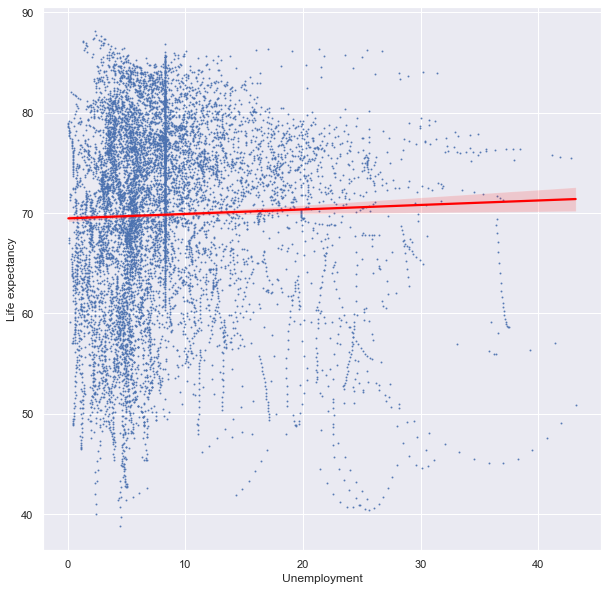

In [79]:
plot_regplot('Unemployment')

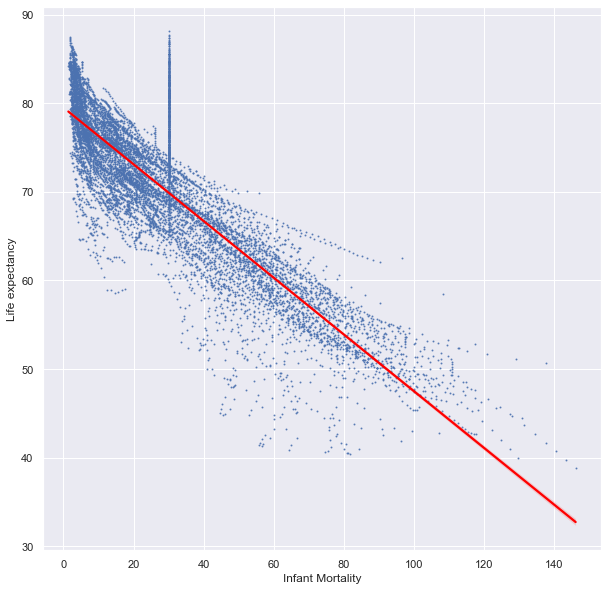

In [80]:
plot_regplot('Infant Mortality')

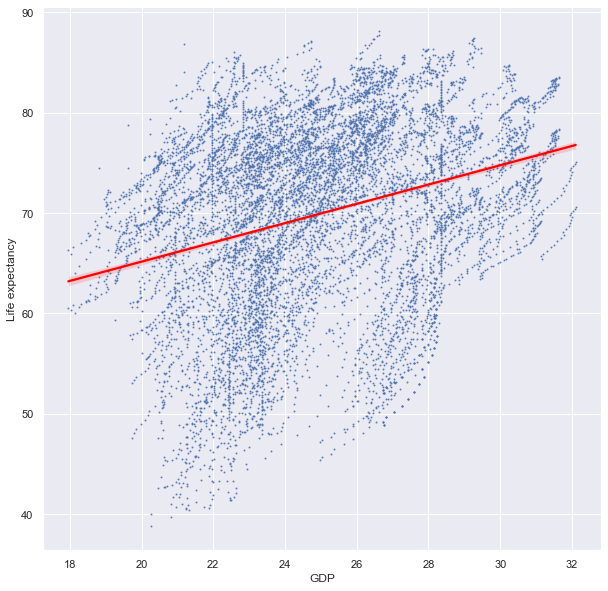

In [81]:
plot_regplot('GDP')

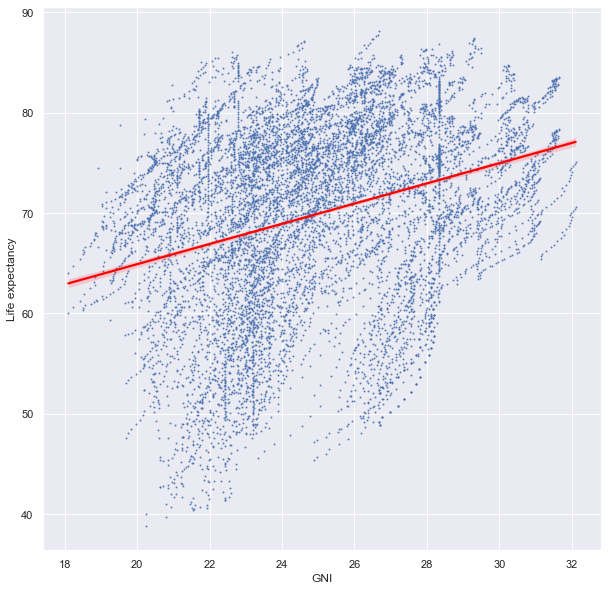

In [82]:
plot_regplot('GNI')

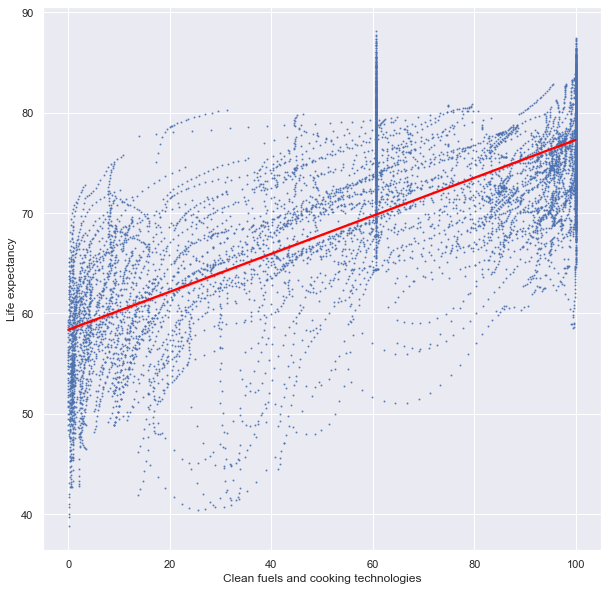

In [83]:
plot_regplot('Clean fuels and cooking technologies')

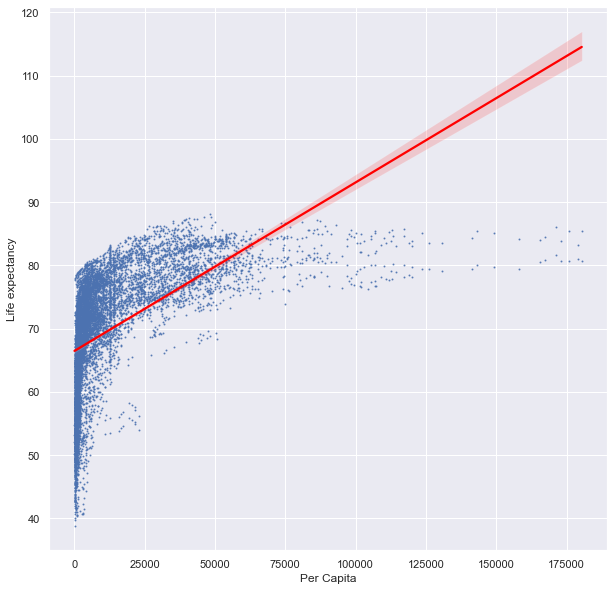

In [84]:
plot_regplot('Per Capita')

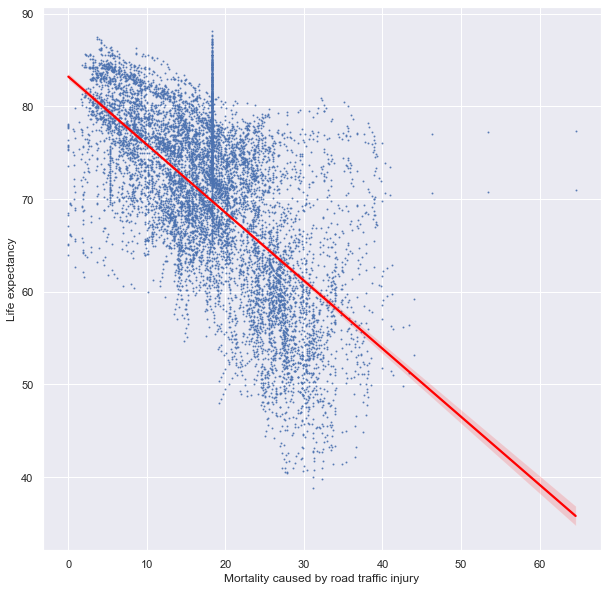

In [85]:
plot_regplot('Mortality caused by road traffic injury')

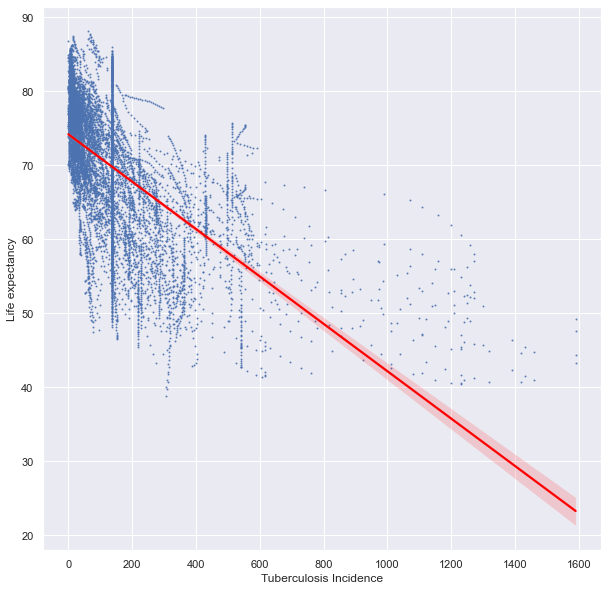

In [86]:
plot_regplot('Tuberculosis Incidence')

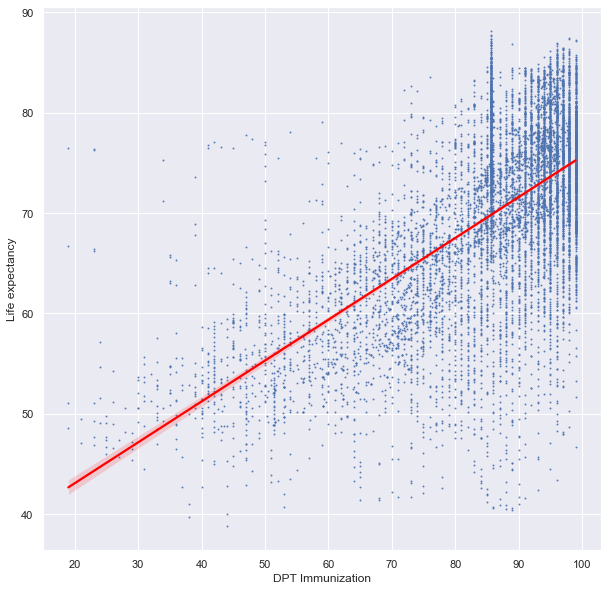

In [87]:
plot_regplot('DPT Immunization')

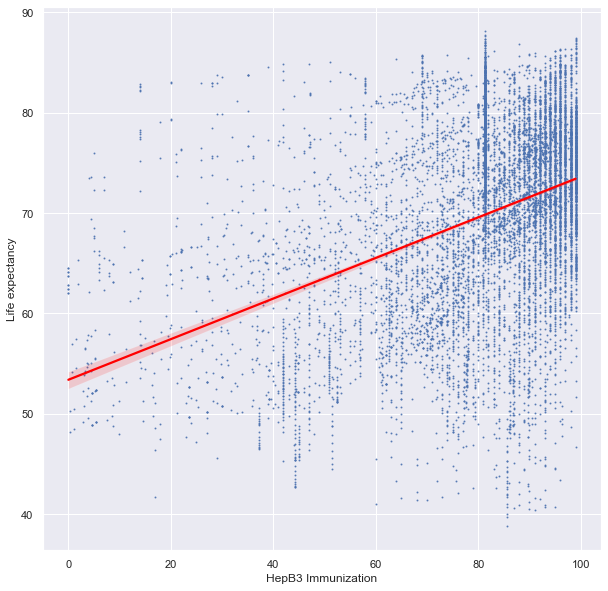

In [88]:
plot_regplot('HepB3 Immunization')

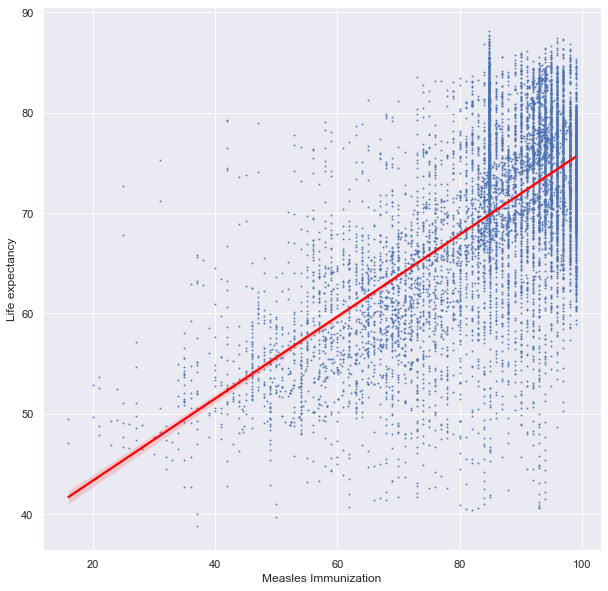

In [89]:
plot_regplot('Measles Immunization')

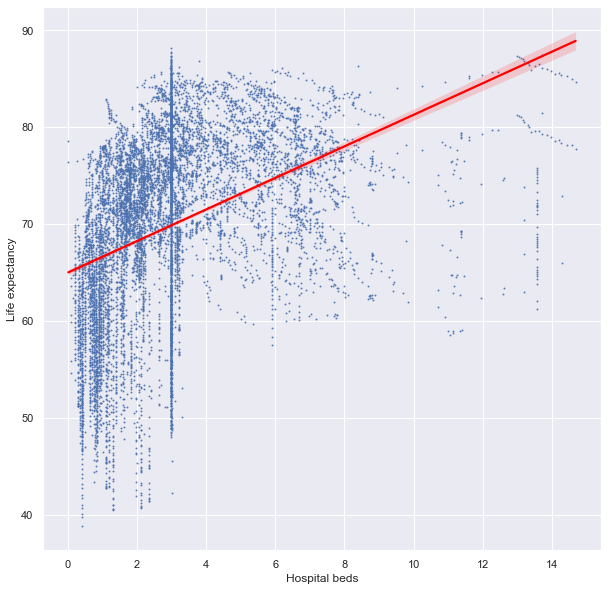

In [90]:
plot_regplot('Hospital beds')

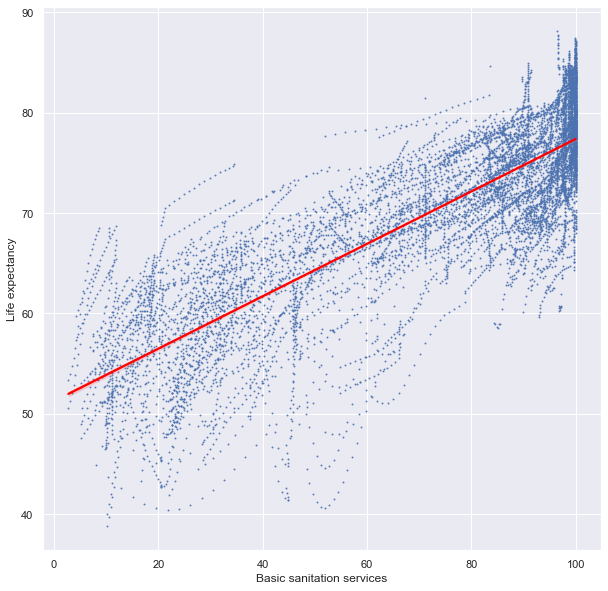

In [91]:
plot_regplot('Basic sanitation services')

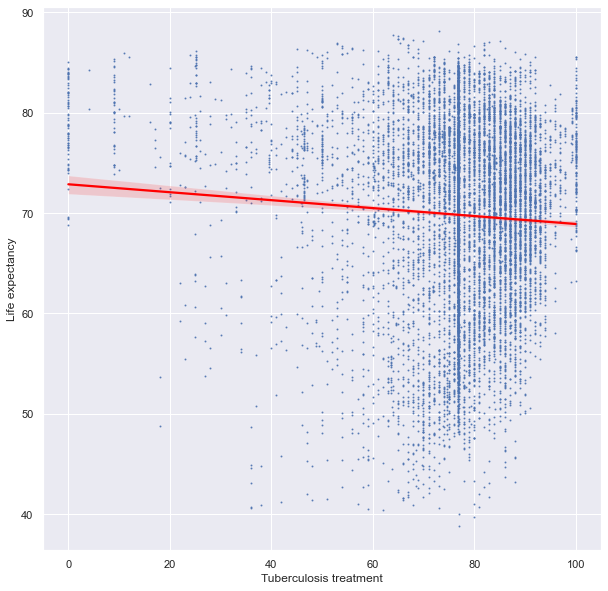

In [92]:
plot_regplot('Tuberculosis treatment')

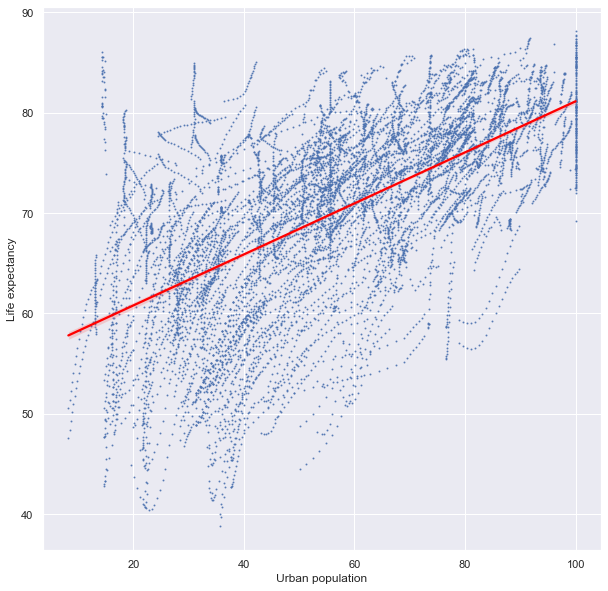

In [93]:
plot_regplot('Urban population')

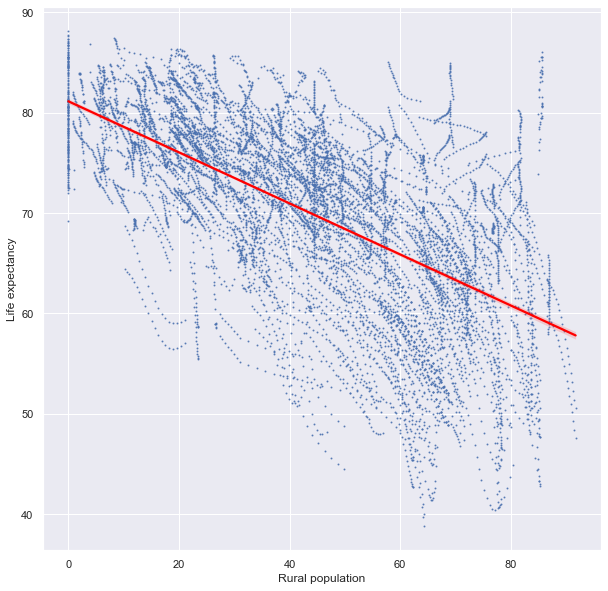

In [94]:
plot_regplot('Rural population')

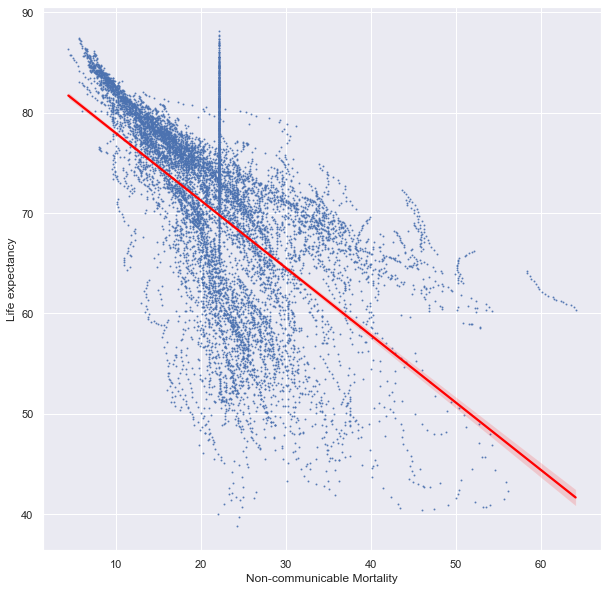

In [95]:
plot_regplot('Non-communicable Mortality')

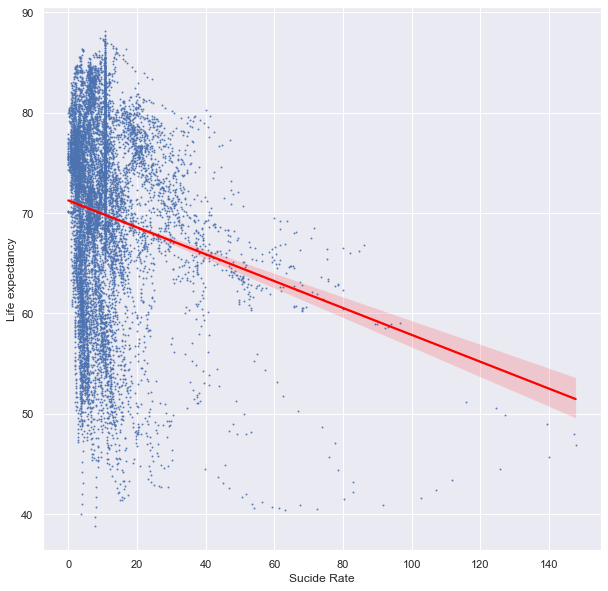

In [96]:
plot_regplot('Sucide Rate')

In [97]:
life_exep_data.corr()

,Year,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
Year,1.000,0.207,-0.041,-0.210,0.144,0.143,0.072,0.137,-0.105,-0.079,0.144,0.253,0.147,-0.035,0.114,0.075,0.085,-0.085,-0.156,-0.056
Life expectancy,0.207,1.000,0.030,-0.875,0.297,0.312,0.752,0.558,-0.649,-0.607,0.622,0.402,0.625,0.400,0.831,-0.063,0.613,-0.613,-0.613,-0.159
Unemployment,-0.041,0.030,1.000,-0.088,-0.158,-0.152,0.157,-0.090,-0.003,0.158,0.076,0.074,0.052,0.045,0.139,-0.114,0.120,-0.120,0.048,0.073
Infant Mortality,-0.210,-0.875,-0.088,1.000,-0.263,-0.264,-0.806,-0.414,0.620,0.509,-0.753,-0.530,-0.752,-0.489,-0.841,0.053,-0.582,0.582,0.444,-0.046
GDP,0.144,0.297,-0.158,-0.263,1.000,0.980,0.332,0.192,-0.172,-0.149,0.127,-0.108,0.155,0.210,0.241,-0.016,0.324,-0.324,-0.354,0.007
GNI,0.143,0.312,-0.152,-0.264,0.980,1.000,0.330,0.206,-0.175,-0.148,0.128,-0.106,0.156,0.212,0.252,-0.005,0.350,-0.350,-0.349,0.008
Clean fuels and cooking technologies,0.072,0.752,0.157,-0.806,0.332,0.330,1.000,0.441,-0.555,-0.506,0.609,0.400,0.636,0.467,0.867,-0.166,0.686,-0.686,-0.433,0.092
Per Capita,0.137,0.558,-0.090,-0.414,0.192,0.206,0.441,1.000,-0.427,-0.288,0.278,0.135,0.262,0.272,0.506,-0.243,0.489,-0.489,-0.380,0.058
Mortality caused by road traffic injury,-0.105,-0.649,-0.003,0.620,-0.172,-0.175,-0.555,-0.427,1.000,0.414,-0.393,-0.204,-0.380,-0.413,-0.605,0.079,-0.378,0.378,0.297,-0.040
Tuberculosis Incidence,-0.079,-0.607,0.158,0.509,-0.149,-0.148,-0.506,-0.288,0.414,1.000,-0.343,-0.207,-0.344,-0.189,-0.531,0.029,-0.384,0.384,0.415,0.175


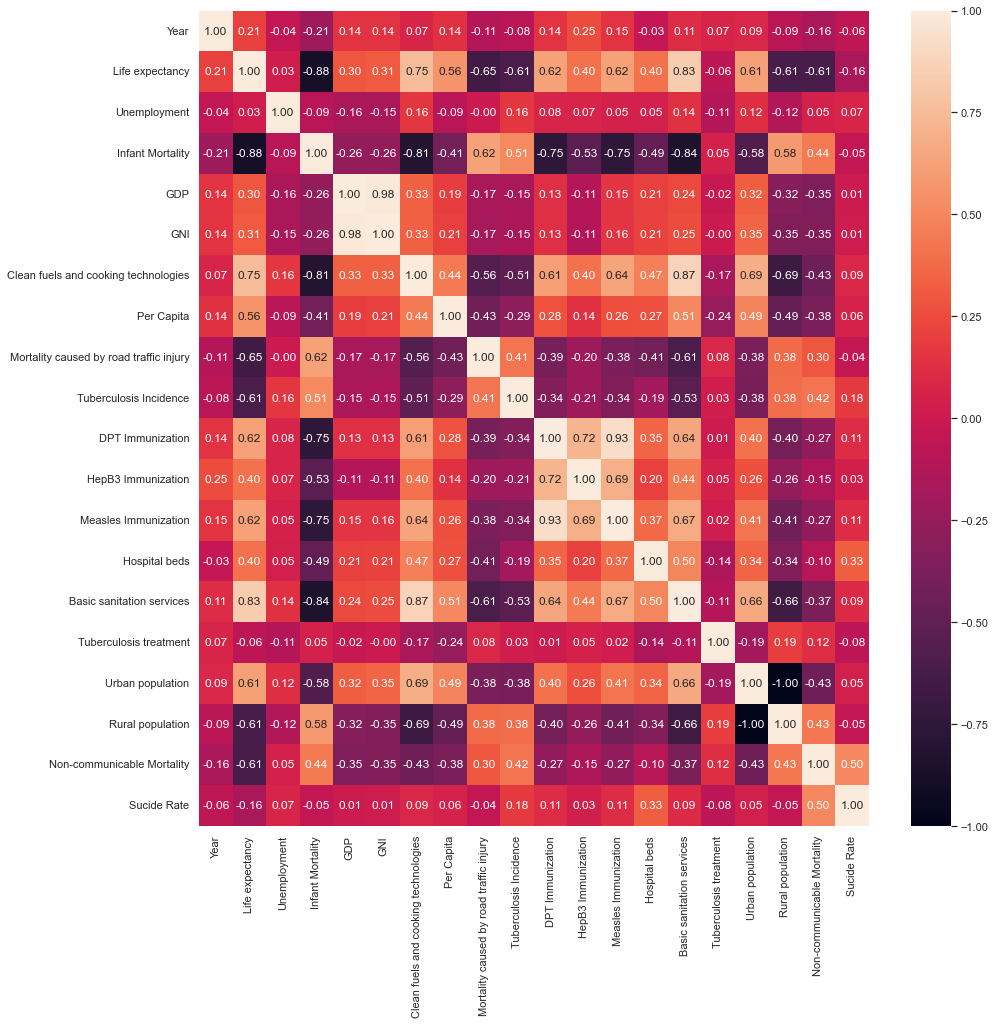

In [98]:
plt.figure(figsize = (15, 15))
sns.heatmap(life_exep_data.corr(), annot = True, fmt = ".2f")
plt.savefig(parentDir + "life_expectancy/images/regplot/heatmap.png", transparent=False, facecolor='w')

From the above corelation plot we can easily say that there are some multicollinearity issues between the variables. To solve this issue we are going to implement the PCA technique (feature selection).

## Standarize the data
We going to encode the Gender column because based on our research question we are going to predict the life expectancy base on the development indicators.


In [99]:
X = life_exep_data.drop(['Country', 'Year', 'Life expectancy', 'Gender'], axis = 1)
Y = life_exep_data['Life expectancy']

In [100]:
X.shape, Y.shape

((9928, 18), (9928,))

In [101]:
X

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,13.846,85.000,23.340,23.627,6.400,434.740,14.700,190.000,24.000,65.077,27.000,0.300,21.871,85.000,22.078,77.922,39.400,4.800
1,13.849,82.700,23.340,23.627,7.200,434.740,15.100,189.000,33.000,65.077,37.000,0.390,21.881,84.000,22.169,77.831,40.100,4.800
2,14.355,80.400,22.123,23.627,8.200,179.427,14.900,189.000,36.000,65.077,35.000,0.390,23.274,87.000,22.261,77.739,40.500,4.600
3,14.222,77.800,22.231,23.627,9.400,190.684,15.000,189.000,41.000,65.077,39.000,0.390,24.667,86.000,22.353,77.647,40.100,4.600
4,14.047,75.300,22.377,23.627,10.400,211.382,15.200,189.000,50.000,65.077,48.000,0.390,26.068,89.000,22.500,77.500,40.200,4.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,4.352,46.600,23.717,23.699,29.800,1445.070,38.700,242.000,87.000,87.000,86.000,2.350,38.121,81.000,32.385,67.615,32.500,23.800
9924,4.358,45.100,23.746,23.727,29.700,1464.589,39.900,233.000,90.000,90.000,95.000,2.350,37.529,81.000,32.296,67.704,31.800,22.500
9925,4.353,44.200,23.590,23.573,29.600,1235.189,40.100,221.000,89.000,89.000,90.000,2.350,36.942,83.000,32.237,67.763,30.900,21.000
9926,4.360,42.900,23.620,23.603,29.800,1254.642,40.600,210.000,89.000,89.000,88.000,2.350,36.357,84.000,32.209,67.791,30.300,19.900


In [102]:
Y

0      57.120
1      57.596
2      58.080
3      58.578
4      59.093
        ...  
9923   57.778
9924   58.565
9925   59.105
9926   59.501
9927   59.798
Name: Life expectancy, Length: 9928, dtype: float64

In [103]:
# Splitting the X and Y into the Training set and Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [104]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7942, 18), (1986, 18), (7942,), (1986,))

In [105]:
# Doing the pre-processing part on training and testing set such as fitting the Standard scale.
scaler = StandardScaler()
  
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [106]:
# Applying PCA function on training
# and testing set of X component
pca = PCA(n_components = 0.9)
  
pca_data = pca.fit(transformed_X_train)

In [107]:
pca_data.explained_variance_ratio_

array([0.39101889, 0.12669721, 0.09031476, 0.08083984, 0.06225106,
       0.04719767, 0.04592309, 0.03526085, 0.03067709])

From the 90% threshold our 18 attributes has been reduced to 9 attributes. This will help use to improve the performance of algorithm significantly.

Lets convert the variance ratio to percentage so that it will be easy to under stand the variance of each component.

In [108]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([39.1 , 51.77, 60.8 , 68.88, 75.11, 79.83, 84.42, 87.95, 91.02])

In [109]:
loadings = pca_data.components_
labels = []
for x in range(1, len(pca_data.components_) + 1):
    labels.append('PC' + str(x))

d1 = dict(zip(labels, loadings))
# construct dataframe from dict of array-lik
loadings_df = pd.DataFrame.from_dict(d1)
# created new column name as 'variable' having values from all column names of X_train
loadings_df['variable'] = X_train.columns.values
# seting 'vaiable' column as index  column
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
Unemployment,-0.025,0.202,0.203,0.301,0.589,-0.425,0.312,0.129,-0.171
Infant Mortality,0.339,-0.110,0.058,0.069,0.036,0.110,-0.116,-0.003,0.023
GDP,-0.151,-0.484,0.144,-0.373,0.162,0.036,0.140,-0.007,-0.114
GNI,-0.154,-0.484,0.149,-0.367,0.169,0.029,0.109,0.008,-0.108
Clean fuels and cooking technologies,-0.337,0.014,0.054,0.057,0.041,-0.136,0.044,-0.123,-0.121
Per Capita,-0.215,-0.120,0.051,0.254,-0.295,0.287,-0.126,0.627,-0.185
Mortality caused by road traffic injury,0.242,-0.010,0.003,-0.070,0.393,0.346,-0.242,-0.273,0.168
Tuberculosis Incidence,0.214,0.067,0.306,-0.066,0.322,0.185,0.074,0.582,0.253
DPT Immunization,-0.282,0.288,-0.091,-0.245,0.111,0.211,0.089,0.034,-0.079


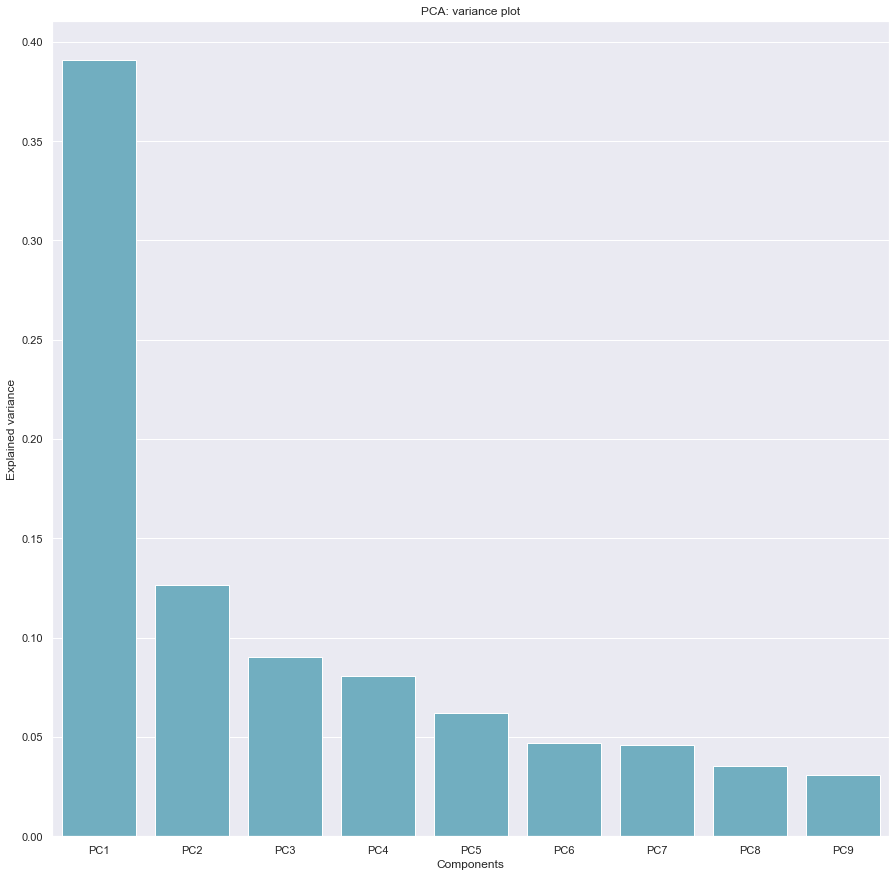

In [110]:
pca_df = pd.DataFrame({'Explained variance':pca_data.explained_variance_ratio_, 'Components':labels}) #Individual 
plt.figure(figsize=(15, 15))
sns.barplot(x = 'Components', y = "Explained variance", data = pca_df, color = "c").set_title("PCA: variance plot")
plt.savefig(parentDir + "life_expectancy/images/regplot/PCA1.png", transparent=False, facecolor='w')

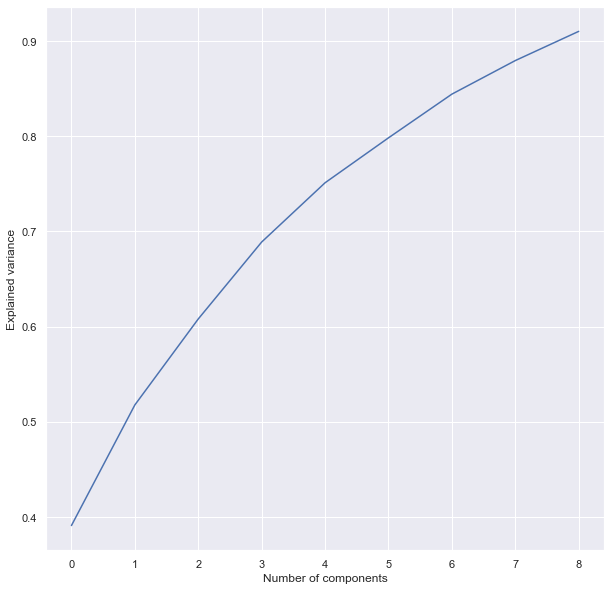

In [111]:
plt.plot(np.cumsum(pca_data.explained_variance_ratio_)) #cumulative
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.savefig(parentDir + "life_expectancy/images/regplot/PCA2.png", transparent=False, facecolor='w')

In [112]:
X_train_pca = pca.transform(transformed_X_train)
X_test_pca = pca.transform(transformed_X_test)

In [113]:
X_train_pca.shape, X_test_pca.shape, Y_train.shape, Y_test.shape

((7942, 9), (1986, 9), (7942,), (1986,))

In [114]:
pd.DataFrame(X_train_pca).to_csv(parentDir + 'life_expectancy/imp/X_train.csv', index = False)
pd.DataFrame(X_test_pca).to_csv(parentDir + 'life_expectancy/imp/X_test.csv', index = False)
Y_train.to_csv(parentDir +  'life_expectancy/imp/Y_train.csv', index=False)
Y_test.to_csv(parentDir +  'life_expectancy/imp/Y_test.csv', index=False)